In [1]:
import numpy as np

In [18]:

def define_hamiltonian(tensor_products):

    # Initialize the Hamiltonian as a zero matrix
    hamiltonian = np.zeros((2**len(tensor_products[0]), 2**len(tensor_products[0])), dtype=np.complex128)

    # Iterate over the tensor products
    for tensor_product in tensor_products:
        # Multiply the Pauli matrices in the tensor product
        pauli_product = np.array([1], dtype=np.complex128)
        for pauli_matrix in tensor_product:
            pauli_product = np.kron(pauli_product, pauli_matrix)

        # Add the tensor product to the Hamiltonian
        hamiltonian += pauli_product

    return hamiltonian

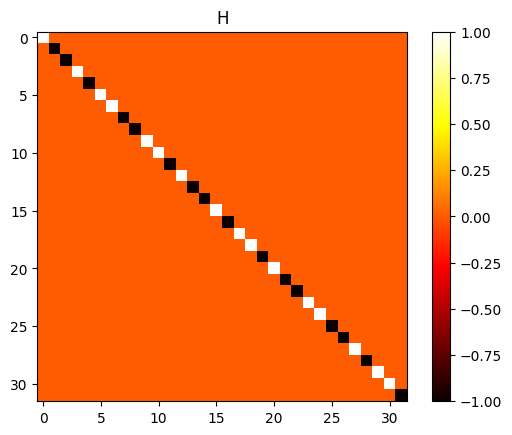

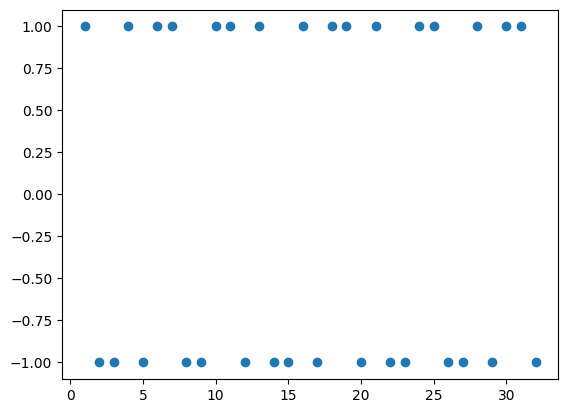

In [39]:
import numpy as np
from scipy.sparse import dok_matrix
import math

def pauli_z(n):
    """
    Create the Pauli-Z matrix of size 2^n x 2^n.
    """
    if n == 0:
        return np.array([[1]])
    sigma_z = np.array([[1, 0], [0, -1]])
    result = sigma_z
    for _ in range(n - 1):
        result = np.kron(result, sigma_z)
    return result

pauli_n=pauli_z(5)
plt.imshow(pauli_n, cmap='hot', interpolation='nearest')
plt.title('H')
plt.colorbar()
plt.show()

eigvals, eigvecs = np.linalg.eig(pauli_n)
plt.scatter(range(1, len(eigvals)+1),eigvals)
plt.show()



In [58]:

def create_hamiltonian_2d_lattice(n):
    """
    Create the Hamiltonian of an arbitrary 2D lattice from summing nearest neighbor interaction terms.
    """
    num_sites = n*n
    hamiltonian = dok_matrix((2**num_sites, 2**num_sites), dtype=complex)

    # make interaction terms for a middle term. 
    # numbering scheme 
    id= np.array([[1,0],[0,1]])
    pauli_x = np.array([[0, 1], [1, 0]])
    pauli_y = np.array([[0, -1j], [1j, 0]])
    pauli_z = np.array([[1, 0], [0, -1]])

    #row=1+math.floor(k/n)
    #column=1+k-math.floor(k/n)

    # go from up left to right and down a row. And at each site, we creat the interaction term with the lattice site to its right and the one down.
    np.eye(1)

    for k in range(num_sites):
        i_int_term_1=np.eye(1)

        print(k)
        #left neighbor interaction
        if k==0:
            identity1 = np.eye(1)
        else:
              identity1 = np.eye(2**(k))
              identity1 = np.eye(2**(k))
              identity2 = np.eye(2**(num_sites-k))
              i_int_term_1=np.kron(identity1, pauli_z)
              i_int_term_1=np.kron(i_int_term_1, pauli_z)
              i_int_term_1=np.kron(i_int_term_1, identity2)


        #lower neightbor interaction term
        i_int_term_2=np.kron(identity1,pauli_z)
        identity3 = np.eye(2**(n))
        identity4 = np.eye(2**(num_sites-k+n))
        i_int_term_2=np.kron(i_int_term_2,identity3)
        i_int_term_2=np.kron(i_int_term_2,pauli_z)
        i_int_term_2=np.kron(i_int_term_2,identity4)
    
        int=i_int_term_1+i_int_term_2
        hamiltonian += int

    return hamiltonian

# Example usage
n=2
hamiltonian = create_hamiltonian_2d_lattice(n)
print(hamiltonian.toarray())

0


ValueError: operands could not be broadcast together with shapes (16,16) (1024,1024) 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def visualize_lattice(n_rows, n_cols):
    """
    Visualize the 2D lattice and interactions between lattice points.
    """
    G = nx.grid_2d_graph(n_rows, n_cols)
    pos = {(i, j): (i, j) for i, j in G.nodes()}
    
    plt.figure(figsize=(8, 8))
    nx.draw(G, pos=pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_color='black')

    for i in range(n_rows):
        for j in range(n_cols):
            index = i * n_cols + j
            neighbors = []
            if i > 0:
                neighbors.append((i-1, j))
            if i < n_rows - 1:
                neighbors.append((i+1, j))
            if j > 0:
                neighbors.append((i, j-1))
            if j < n_cols - 1:
                neighbors.append((i, j+1))

            for neighbor in neighbors:
                plt.plot([pos[(i, j)][0], pos[neighbor][0]], [pos[(i, j)][1], pos[neighbor][1]], 'r--')

    plt.title('2D Lattice with Interactions')
    plt.axis('off')
    plt.show()

# Example usage
n_rows = 2
n_cols = 2
visualize_lattice(n_rows, n_cols)

/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


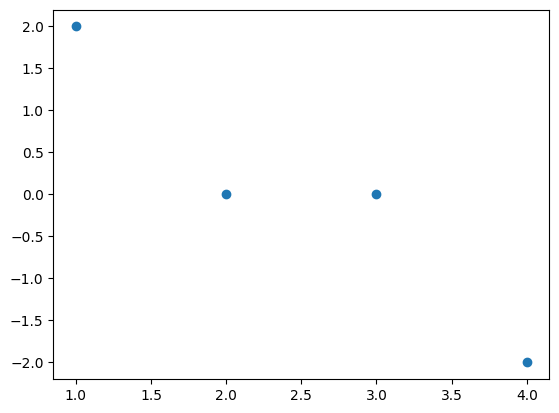

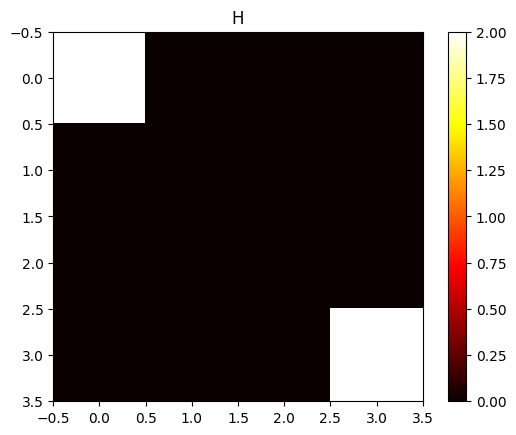

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Pauli matrices
id= np.array([[1,0],[0,1]])
pauli_x = np.array([[0, 1], [1, 0]])
pauli_y = np.array([[0, -1j], [1j, 0]])
pauli_z = np.array([[1, 0], [0, -1]])

# Define the tensor products
tensor_products = [
    [pauli_z, id],
    [id, pauli_z]
]



# Define the Hamiltonian
hamiltonian = define_hamiltonian(tensor_products)


# Visualize the Hamiltonian
eigvals, eigvecs = np.linalg.eig(hamiltonian)
plt.scatter(range(1, len(eigvals)+1),eigvals)
plt.show()

plt.imshow(np.abs(hamiltonian), cmap='hot', interpolation='nearest')
plt.title('H')
plt.colorbar()
plt.show()
